In [1]:
from SVM import SVM
from MLP import MLP
from OnlineHDv1 import OnlineHDv1
from OnlineHDv2 import OnlineHDv2
from NeuralHDv1 import NeuralHDv1
from NeuralHDv2 import NeuralHDv2
from testcode import NeuralHDSpecial
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
path="../../../Data/malware-classification/"
with open(path+'data11.npy', 'rb') as f:
    transxtrain=np.load(f)
    transx_test=np.load(f)
    transytrain=np.load(f)
    transy_test=np.load(f)
xtr=torch.from_numpy(transxtrain).float()
xte=torch.from_numpy(transx_test).float()
ytr=torch.from_numpy(transytrain).long()
yte=torch.from_numpy(transy_test).long()

In [3]:
factors=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
means=[]
medians=[]
deviations=[]
repetitions=1
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=SVM()
        model.fit(transxtrain[:int(transxtrain.shape[0]*factor),:],transytrain[:int(transxtrain.shape[0]*factor)])
        yhat=model(transx_test)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)

0.05
[0.7721751932278248]
0.1
[0.8034596981965403]
0.2
[0.8317997791682002]
0.3
[0.8428413691571587]
0.4
[0.8759661391240339]
0.5
[0.8807508281192492]
0.6
[0.8833271991166728]
0.7
[0.8899521531100478]
0.8
[0.8940007361059993]
0.9
[0.8951048951048951]
1
[0.895472948104527]


SVM
[0.7721751932278248, 0.8034596981965403, 0.8317997791682002, 0.8428413691571587, 0.8759661391240339, 0.8807508281192492, 0.8833271991166728, 0.8899521531100478, 0.8940007361059993, 0.8951048951048951, 0.895472948104527]


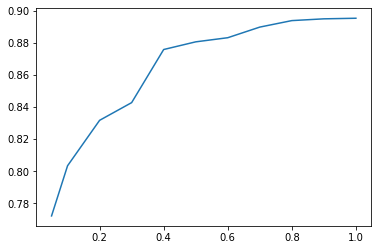

[0.7721751932278248, 0.8034596981965403, 0.8317997791682002, 0.8428413691571587, 0.8759661391240339, 0.8807508281192492, 0.8833271991166728, 0.8899521531100478, 0.8940007361059993, 0.8951048951048951, 0.895472948104527]


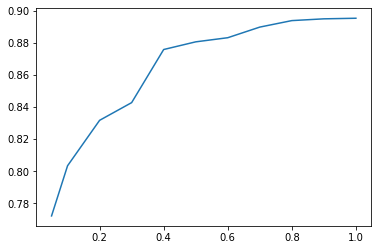

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


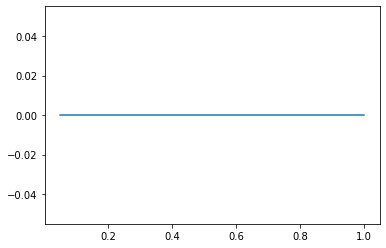

In [4]:
print("SVM")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)

In [3]:
factors=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=MLP(classes =9, features=257, dim = 1024)
        model.fit(transxtrain[:int(transxtrain.shape[0]*factor),:],transytrain[:int(transxtrain.shape[0]*factor)],64,75,.003)
        yhat=model(transx_test)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)

0.05
(407, 257) (407, 9)
(407, 257) (407, 9)
(407, 257) (407, 9)
(407, 257) (407, 9)
(407, 257) (407, 9)
(407, 257) (407, 9)
(407, 257) (407, 9)
(407, 257) (407, 9)
(407, 257) (407, 9)
(407, 257) (407, 9)
0.1
(815, 257) (815, 9)
(815, 257) (815, 9)
(815, 257) (815, 9)
(815, 257) (815, 9)
(815, 257) (815, 9)
(815, 257) (815, 9)
(815, 257) (815, 9)
(815, 257) (815, 9)
(815, 257) (815, 9)
(815, 257) (815, 9)
0.2
(1630, 257) (1630, 9)
(1630, 257) (1630, 9)
(1630, 257) (1630, 9)
(1630, 257) (1630, 9)
(1630, 257) (1630, 9)
(1630, 257) (1630, 9)
(1630, 257) (1630, 9)
(1630, 257) (1630, 9)
(1630, 257) (1630, 9)
(1630, 257) (1630, 9)
0.3
(2445, 257) (2445, 9)
(2445, 257) (2445, 9)
(2445, 257) (2445, 9)
(2445, 257) (2445, 9)
(2445, 257) (2445, 9)
(2445, 257) (2445, 9)
(2445, 257) (2445, 9)
(2445, 257) (2445, 9)
(2445, 257) (2445, 9)
(2445, 257) (2445, 9)
0.4
(3260, 257) (3260, 9)
(3260, 257) (3260, 9)
(3260, 257) (3260, 9)
(3260, 257) (3260, 9)
(3260, 257) (3260, 9)
(3260, 257) (3260, 9)
(3260, 

MLP
[0.8463378726536621, 0.8809348546190652, 0.9063305115936695, 0.9262053735737946, 0.930806036069194, 0.9423997055576003, 0.9488406330511594, 0.9503128450496872, 0.9523371365476628, 0.9563857195436143, 0.9600662495399338]


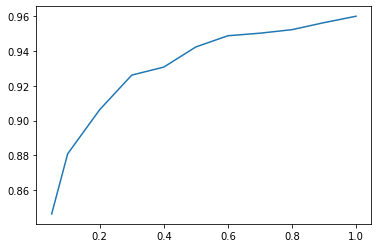

[0.8401545822598454, 0.8790945896209053, 0.9066249539933751, 0.9252116304747883, 0.933051159366949, 0.942694147957306, 0.9492822966507177, 0.946117040853883, 0.9505704821494294, 0.9503128450496872, 0.9594773647405226]


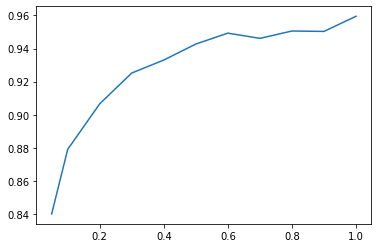

[0.01784965981232291, 0.006913618681150947, 0.007421631539957113, 0.005107323889201807, 0.005216623830313396, 0.0031189098715319013, 0.0015423133485282894, 0.01282092958826779, 0.00737953148014229, 0.01417649189448104, 0.002928046095428621]


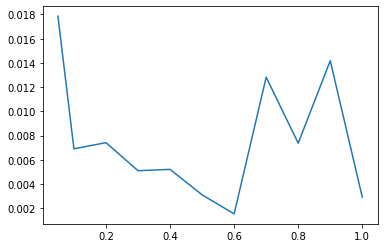

In [4]:
print("MLP")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)

In [4]:
factors=[.05]
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=OnlineHDv2(classes =9, features =257, dim = 1024, batch_size=64,lr=.0001)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],75)
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)

0.05


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv2.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [150, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)
/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv2.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [147, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to ze

[tensor(0.8517), tensor(0.7884), tensor(0.8852), tensor(0.8572), tensor(0.8830), tensor(0.8826), tensor(0.8373), tensor(0.8833), tensor(0.8473), tensor(0.8936)]


In [3]:
factors=[.05]
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=OnlineHDv1(classes =9, features =257, dim = 1024, batch_size=64,lr=.0001)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],75)
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)

0.05


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [150, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)
/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [147, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to ze

[tensor(0.8244), tensor(0.8704), tensor(0.8266), tensor(0.8793), tensor(0.8406), tensor(0.8233), tensor(0.8749), tensor(0.8395), tensor(0.8568), tensor(0.8185)]


In [12]:
factors=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=OnlineHDv1(classes =9, features =257, dim = 1024, batch_size=64,lr=.0003)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],75)
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)

0.05
[tensor(0.8336), tensor(0.8222), tensor(0.8668), tensor(0.5333), tensor(0.8745), tensor(0.8789), tensor(0.8756), tensor(0.8693), tensor(0.5532), tensor(0.8336)]
0.1


KeyboardInterrupt: 

OnlineHDv1 .0037 lr 75 epoch 64 batch_size
[0.8660287, 0.90596247, 0.9217887, 0.9274936, 0.9330144, 0.9319102, 0.93595874, 0.9433198, 0.9490247, 0.9457122, 0.94147956]


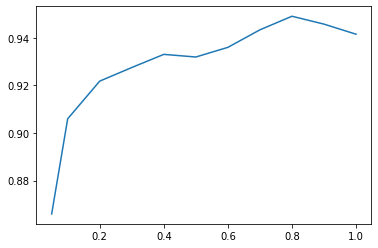

[0.8599558, 0.8952521, 0.9208318, 0.92793524, 0.93375045, 0.93047476, 0.9348915, 0.9358484, 0.94769967, 0.94155324, 0.93651086]


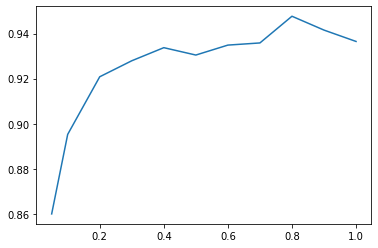

[0.017674405, 0.018791042, 0.0035549125, 0.003723707, 0.0050625694, 0.011329156, 0.008987502, 0.022276204, 0.004402662, 0.011602499, 0.012613271]


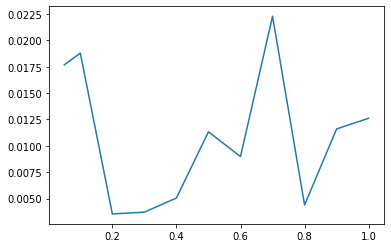

In [9]:
print("OnlineHDv1 .0037 lr 75 epoch 64 batch_size")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)

In [6]:
factors=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=OnlineHDv2(classes =9, features =257, dim = 2048, batch_size=64,lr=.0001)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],210)
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)

0.05
[tensor(0.8616), tensor(0.8947), tensor(0.8785), tensor(0.8649), tensor(0.8811), tensor(0.8907), tensor(0.8958), tensor(0.8896), tensor(0.8940), tensor(0.8848)]
0.1
[tensor(0.9172), tensor(0.9231), tensor(0.9231), tensor(0.9073), tensor(0.9194), tensor(0.9183), tensor(0.9087), tensor(0.9271), tensor(0.8929), tensor(0.9172)]
0.2
[tensor(0.9242), tensor(0.9220), tensor(0.9279), tensor(0.9308), tensor(0.9315), tensor(0.9242), tensor(0.9153), tensor(0.9279), tensor(0.9268), tensor(0.9356)]
0.3


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv2.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [132, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9389), tensor(0.9374), tensor(0.9422), tensor(0.9437), tensor(0.9426), tensor(0.9349), tensor(0.9356), tensor(0.9407), tensor(0.9426), tensor(0.9349)]
0.4


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv2.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [176, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9477), tensor(0.9455), tensor(0.9492), tensor(0.9374), tensor(0.9341), tensor(0.9444), tensor(0.9058), tensor(0.9437), tensor(0.9441), tensor(0.9477)]
0.5


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv2.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [220, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9334), tensor(0.8727), tensor(0.9356), tensor(0.9510), tensor(0.9485), tensor(0.9536), tensor(0.9393), tensor(0.9422), tensor(0.9544), tensor(0.9382)]
0.6


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv2.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [7, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.8399), tensor(0.9275), tensor(0.9430), tensor(0.9536), tensor(0.9470), tensor(0.7961), tensor(0.9098), tensor(0.9407), tensor(0.9315), tensor(0.8826)]
0.7


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv2.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [51, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9183), tensor(0.9223), tensor(0.9264), tensor(0.9282), tensor(0.9474), tensor(0.9481), tensor(0.8922), tensor(0.9533), tensor(0.9194), tensor(0.9510)]
0.8


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv2.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [95, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9529), tensor(0.9363), tensor(0.9551), tensor(0.9533), tensor(0.9282), tensor(0.9396), tensor(0.9562), tensor(0.9499), tensor(0.9503), tensor(0.9529)]
0.9


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv2.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [139, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9139), tensor(0.9463), tensor(0.9499), tensor(0.9525), tensor(0.9492), tensor(0.9591), tensor(0.9588), tensor(0.9617), tensor(0.9533), tensor(0.9584)]
1


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv2.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [184, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9194), tensor(0.9551), tensor(0.9551), tensor(0.9606), tensor(0.9253), tensor(0.9569), tensor(0.9518), tensor(0.9330), tensor(0.9551), tensor(0.9481)]


OnlineHDv2 .0003 lr 75 epoch 64 batch_size
[0.8871918, 0.9177401, 0.9273095, 0.9398233, 0.94424, 0.94074345, 0.92951787, 0.9273095, 0.951601, 0.9528892, 0.95344126]


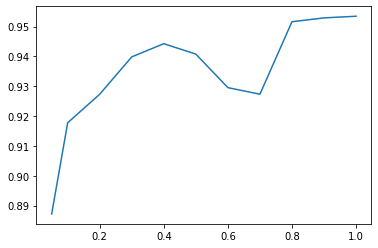

[0.8835848, 0.91542137, 0.9266103, 0.9393449, 0.9399706, 0.936879, 0.9071771, 0.9306588, 0.9474789, 0.9503129, 0.9460434]


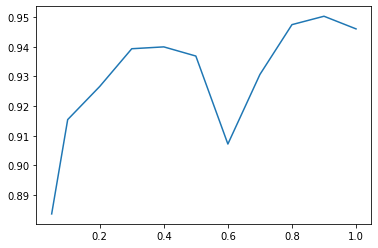

[0.011547772, 0.009505173, 0.0053467895, 0.0032911436, 0.012235155, 0.022574132, 0.049631458, 0.018344553, 0.008924881, 0.013055259, 0.013874382]


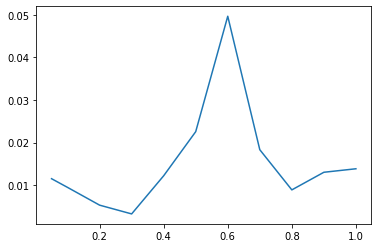

In [7]:
print("OnlineHDv2 .0003 lr 75 epoch 64 batch_size")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)

In [10]:
factors=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=NeuralHDv1(classes =9, features =257, dim = 2048, batch_size=64,lr=.0001)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],35,5,.1)
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
        
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)

0.05


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [150, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)
/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [147, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to ze

[tensor(0.8498), tensor(0.8671), tensor(0.8649), tensor(0.8749), tensor(0.8612), tensor(0.8708), tensor(0.8520), tensor(0.8620), tensor(0.8432), tensor(0.8612)]
0.1


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [44, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.8679), tensor(0.8767), tensor(0.8554), tensor(0.8583), tensor(0.8520), tensor(0.8509), tensor(0.8675), tensor(0.8944), tensor(0.8796), tensor(0.8830)]
0.2


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [88, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9102), tensor(0.9014), tensor(0.9106), tensor(0.9032), tensor(0.9025), tensor(0.9080), tensor(0.9073), tensor(0.9069), tensor(0.9087), tensor(0.9014)]
0.3


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [132, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9198), tensor(0.9205), tensor(0.9260), tensor(0.9334), tensor(0.9264), tensor(0.9231), tensor(0.9131), tensor(0.9168), tensor(0.9183), tensor(0.9209)]
0.4


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [176, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9371), tensor(0.9282), tensor(0.9227), tensor(0.9304), tensor(0.9389), tensor(0.9378), tensor(0.9367), tensor(0.9338), tensor(0.9374), tensor(0.9338)]
0.5


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [220, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9441), tensor(0.9407), tensor(0.9418), tensor(0.9437), tensor(0.9466), tensor(0.9455), tensor(0.9463), tensor(0.9393), tensor(0.9437), tensor(0.9477)]
0.6


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [7, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9396), tensor(0.9385), tensor(0.9245), tensor(0.9389), tensor(0.9363), tensor(0.9430), tensor(0.9448), tensor(0.9455), tensor(0.9216), tensor(0.9212)]
0.7


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [51, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9510), tensor(0.9452), tensor(0.9510), tensor(0.9488), tensor(0.9459), tensor(0.9496), tensor(0.9507), tensor(0.9481), tensor(0.9499), tensor(0.9404)]
0.8


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [95, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9522), tensor(0.9510), tensor(0.9488), tensor(0.9522), tensor(0.9492), tensor(0.9503), tensor(0.9474), tensor(0.9544), tensor(0.9544), tensor(0.9452)]
0.9


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [139, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9522), tensor(0.9533), tensor(0.9525), tensor(0.9540), tensor(0.9378), tensor(0.9562), tensor(0.9522), tensor(0.9514), tensor(0.9566), tensor(0.9518)]
1


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [184, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9544), tensor(0.9510), tensor(0.9459), tensor(0.9507), tensor(0.9492), tensor(0.9533), tensor(0.9507), tensor(0.9577), tensor(0.9544), tensor(0.9580)]


NeuralHDv1 .0001 lr 15 epochs x5 (4 regens) 64 batch_size
[0.8616121, 0.86768496, 0.9070666, 0.9206846, 0.9352226, 0.9438719, 0.93871915, 0.9492087, 0.9506809, 0.95233715, 0.9521531]


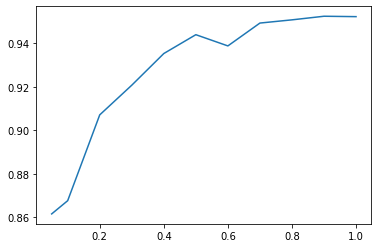

[0.86072874, 0.86856824, 0.9059992, 0.9218256, 0.93367684, 0.9439455, 0.9354068, 0.94806767, 0.95049685, 0.9517851, 0.95252115]


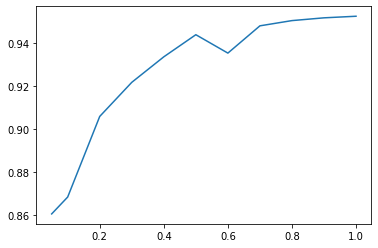

[0.009290976, 0.013882425, 0.0033980617, 0.0054172585, 0.0048933, 0.0025713756, 0.008929746, 0.0032147393, 0.0027993827, 0.004959845, 0.003579778]


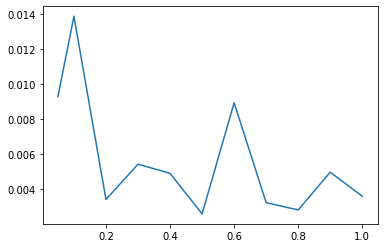

In [11]:
print("NeuralHDv1 .0001 lr 15 epochs x5 (4 regens) 64 batch_size")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)

In [3]:
factors=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=NeuralHDv2(classes =9, features =257, dim = 2048, batch_size=64,lr=.0001)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],35,5,.1)
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
        
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)

0.05


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:55: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [150, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)
/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:55: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [147, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to ze

[tensor(0.8870), tensor(0.8620), tensor(0.8763), tensor(0.8830), tensor(0.8859), tensor(0.8841), tensor(0.8535), tensor(0.8660), tensor(0.8406), tensor(0.8741)]
0.1


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:55: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [44, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9025), tensor(0.8944), tensor(0.8984), tensor(0.8855), tensor(0.8918), tensor(0.8977), tensor(0.9021), tensor(0.8969), tensor(0.9069), tensor(0.8929)]
0.2


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:55: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [88, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9282), tensor(0.9260), tensor(0.9231), tensor(0.9268), tensor(0.9172), tensor(0.9223), tensor(0.9308), tensor(0.9345), tensor(0.9249), tensor(0.9231)]
0.3


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:55: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [132, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9371), tensor(0.9356), tensor(0.9378), tensor(0.9113), tensor(0.9389), tensor(0.9036), tensor(0.9426), tensor(0.9323), tensor(0.9352), tensor(0.8671)]
0.4


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:55: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [176, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9168), tensor(0.9455), tensor(0.9422), tensor(0.9433), tensor(0.9422), tensor(0.9441), tensor(0.9452), tensor(0.9411), tensor(0.9481), tensor(0.9385)]
0.5


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:55: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [220, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9492), tensor(0.9426), tensor(0.9525), tensor(0.9470), tensor(0.9477), tensor(0.9488), tensor(0.9499), tensor(0.9518), tensor(0.9463), tensor(0.9470)]
0.6


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:55: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [7, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9510), tensor(0.9507), tensor(0.9529), tensor(0.9496), tensor(0.9569), tensor(0.9547), tensor(0.9466), tensor(0.9503), tensor(0.9448), tensor(0.9234)]
0.7


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:55: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [51, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9301), tensor(0.9529), tensor(0.9533), tensor(0.9533), tensor(0.9536), tensor(0.9555), tensor(0.9536), tensor(0.9547), tensor(0.9555), tensor(0.9551)]
0.8


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:55: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [95, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9540), tensor(0.9580), tensor(0.9595), tensor(0.9536), tensor(0.9525), tensor(0.9544), tensor(0.9603), tensor(0.9499), tensor(0.9540), tensor(0.9540)]
0.9


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:55: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [139, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9194), tensor(0.9551), tensor(0.9591), tensor(0.9555), tensor(0.9566), tensor(0.9533), tensor(0.9577), tensor(0.9555), tensor(0.9595), tensor(0.9573)]
1


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:55: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [184, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


[tensor(0.9312), tensor(0.9625), tensor(0.9654), tensor(0.9606), tensor(0.9569), tensor(0.9588), tensor(0.9584), tensor(0.9610), tensor(0.9617), tensor(0.9595)]


NeuralHDv2 .0001 lr 15 epochs x5 (4 regens) 64 batch_size
[0.8752301, 0.89731324, 0.9254693, 0.9354067, 0.94276774, 0.94828856, 0.9504969, 0.9536253, 0.9539934, 0.9560177, 0.9600662]


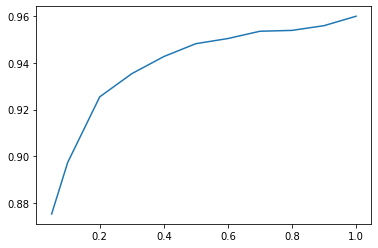

[0.87125504, 0.8969084, 0.92569005, 0.92414427, 0.9407066, 0.94828856, 0.9481045, 0.9517482, 0.95502394, 0.95288926, 0.95760024]


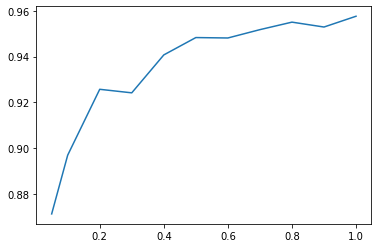

[0.014709049, 0.0058158115, 0.0045717238, 0.02251598, 0.00834181, 0.0027258184, 0.008879158, 0.0072842017, 0.003069653, 0.011309472, 0.0090914285]


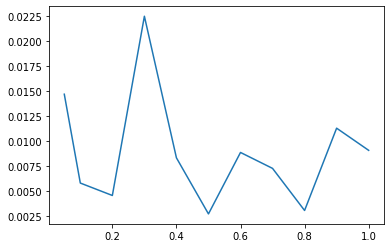

In [4]:
print("NeuralHDv2 .0001 lr 15 epochs x5 (4 regens) 64 batch_size")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)

In [15]:
factors=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=NeuralHDSpecial(9,257,1024,batch_size=64,trainopt=2,bestinclass=True,lr=.0001)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],15,4,0.1)
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
        
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)

0.05
test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:60: UserWarning: An output with one or more elements was resized since it had shape [5, 1024], which does not match the required output shape [2, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)
/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:60: UserWarning: An output with one or more elements was resized since it had shape [28, 1024], which does not match the required output shape [1, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements

test
test
test
test
test
test
test
test
test
[tensor(0.8738), tensor(0.8793), tensor(0.8833), tensor(0.8789), tensor(0.8528), tensor(0.8815), tensor(0.8730), tensor(0.8749), tensor(0.8734), tensor(0.8870)]
0.1
test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:60: UserWarning: An output with one or more elements was resized since it had shape [9, 1024], which does not match the required output shape [5, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


test
test
test
test
test
test
test
test
test
[tensor(0.8863), tensor(0.8804), tensor(0.8877), tensor(0.8922), tensor(0.8804), tensor(0.8892), tensor(0.8815), tensor(0.8837), tensor(0.8830), tensor(0.8815)]
0.2
test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:60: UserWarning: An output with one or more elements was resized since it had shape [17, 1024], which does not match the required output shape [15, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


test
test
test
test
test
test
test
test
test
[tensor(0.9098), tensor(0.9109), tensor(0.9028), tensor(0.9039), tensor(0.8888), tensor(0.9069), tensor(0.9036), tensor(0.8855), tensor(0.9054), tensor(0.9021)]
0.3
test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:60: UserWarning: An output with one or more elements was resized since it had shape [25, 1024], which does not match the required output shape [20, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


test
test
test
test
test
test
test
test
test
[tensor(0.9179), tensor(0.9249), tensor(0.9279), tensor(0.9326), tensor(0.9161), tensor(0.9168), tensor(0.9209), tensor(0.9275), tensor(0.9128), tensor(0.9187)]
0.4
test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:60: UserWarning: An output with one or more elements was resized since it had shape [33, 1024], which does not match the required output shape [26, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


test
test
test
test
test
test
test
test
test
[tensor(0.9360), tensor(0.9319), tensor(0.9260), tensor(0.9268), tensor(0.9323), tensor(0.9319), tensor(0.9319), tensor(0.9275), tensor(0.9290), tensor(0.9212)]
0.5
test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:60: UserWarning: An output with one or more elements was resized since it had shape [41, 1024], which does not match the required output shape [16, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


test
test
test
test
test
test
test
test
test
[tensor(0.9360), tensor(0.9352), tensor(0.9374), tensor(0.9341), tensor(0.9385), tensor(0.9407), tensor(0.9396), tensor(0.9367), tensor(0.9363), tensor(0.9363)]
0.6
test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:60: UserWarning: An output with one or more elements was resized since it had shape [49, 1024], which does not match the required output shape [39, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


test
test
test
test
test
test
test
test
test
[tensor(0.9382), tensor(0.9422), tensor(0.9415), tensor(0.9345), tensor(0.9393), tensor(0.9382), tensor(0.9360), tensor(0.9411), tensor(0.9396), tensor(0.9374)]
0.7
test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:60: UserWarning: An output with one or more elements was resized since it had shape [58, 1024], which does not match the required output shape [21, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


test
test
test
test
test
test
test
test
test
[tensor(0.9433), tensor(0.9407), tensor(0.9422), tensor(0.9393), tensor(0.9418), tensor(0.9404), tensor(0.9463), tensor(0.9459), tensor(0.9433), tensor(0.9444)]
0.8
test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:60: UserWarning: An output with one or more elements was resized since it had shape [66, 1024], which does not match the required output shape [52, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


test
test
test
test
test
test
test
test
test
[tensor(0.9433), tensor(0.9396), tensor(0.9393), tensor(0.9426), tensor(0.9452), tensor(0.9441), tensor(0.9492), tensor(0.9378), tensor(0.9400), tensor(0.9400)]
0.9
test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:60: UserWarning: An output with one or more elements was resized since it had shape [74, 1024], which does not match the required output shape [9, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


test
test
test
test
test
test
test
test
test
[tensor(0.9496), tensor(0.9452), tensor(0.9448), tensor(0.9393), tensor(0.9374), tensor(0.9455), tensor(0.9455), tensor(0.9433), tensor(0.9418), tensor(0.9452)]
1
test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:60: UserWarning: An output with one or more elements was resized since it had shape [82, 1024], which does not match the required output shape [33, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


test
test
test
test
test
test
test
test
test
[tensor(0.9525), tensor(0.9474), tensor(0.9481), tensor(0.9474), tensor(0.9481), tensor(0.9492), tensor(0.9455), tensor(0.9529), tensor(0.9430), tensor(0.9463)]


NeuralHDSpecial .0001 lr 15 epochs x5 (4 regens) 64 batch_size BIC=True
[0.87688625, 0.8833272, 0.9037541, 0.9197644, 0.930438, 0.9365108, 0.93871915, 0.94276774, 0.94129556, 0.9449761, 0.9477365]


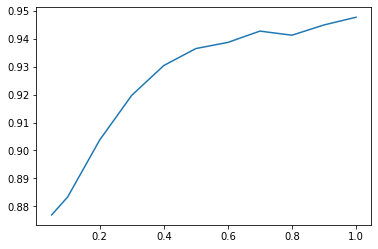

[0.8757822, 0.8845786, 0.90198743, 0.92160475, 0.9294443, 0.93709975, 0.9387928, 0.94276774, 0.9421052, 0.94376147, 0.94803095]


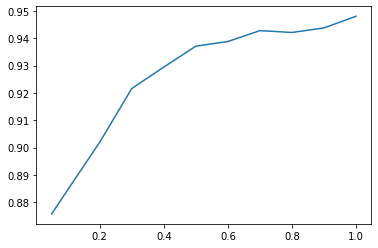

[0.008859684, 0.0038678842, 0.007921342, 0.0060072658, 0.0039880862, 0.0019227026, 0.0023338704, 0.0022037146, 0.0032673804, 0.0033034652, 0.0028499675]


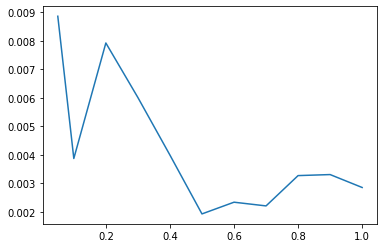

In [16]:
print("NeuralHDSpecial .0001 lr 15 epochs x5 (4 regens) 64 batch_size BIC=True")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)

In [17]:
factors=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=NeuralHDSpecial(9,257,1024,batch_size=4,trainopt=2,bestinclass=True,lr=.0001)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],15,4,0.1)
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
        
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)

0.05
test
test
test
test
test
test
test
test
test
test
[tensor(0.8907), tensor(0.9014), tensor(0.8925), tensor(0.8785), tensor(0.8903), tensor(0.8782), tensor(0.8760), tensor(0.8929), tensor(0.8888), tensor(0.8892)]
0.1
test
test
test
test
test
test
test
test
test
test
[tensor(0.9032), tensor(0.8984), tensor(0.8988), tensor(0.9025), tensor(0.9010), tensor(0.8992), tensor(0.8940), tensor(0.8911), tensor(0.9058), tensor(0.9014)]
0.2
test
test
test
test
test
test
test
test
test
test
[tensor(0.9179), tensor(0.9142), tensor(0.9142), tensor(0.9227), tensor(0.9172), tensor(0.9084), tensor(0.9113), tensor(0.9142), tensor(0.9183), tensor(0.9179)]
0.3
test
test
test
test
test
test
test
test
test
test
[tensor(0.9345), tensor(0.9360), tensor(0.9378), tensor(0.9312), tensor(0.9264), tensor(0.9304), tensor(0.9301), tensor(0.9330), tensor(0.9352), tensor(0.9338)]
0.4
test
test
test
test
test
test
test
test
test
test
[tensor(0.9444), tensor(0.9466), tensor(0.9426), tensor(0.9407), tensor(0.9371), tens

NeuralHDSpecial .0001 lr 15 epochs x5 (4 regens) 4 batch_size BIC=True
[0.8897681, 0.90007365, 0.9157158, 0.9333824, 0.9381671, 0.94239974, 0.9457122, 0.9471844, 0.9504969, 0.951049, 0.95307326]


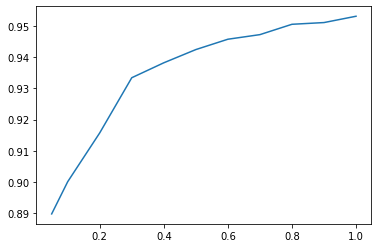

[0.8878542, 0.89952147, 0.91564226, 0.93283033, 0.9393817, 0.9427678, 0.9446448, 0.94659555, 0.9509018, 0.9514906, 0.95384616]


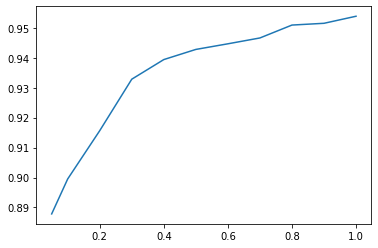

[0.0075393454, 0.004134666, 0.0038418754, 0.0031842466, 0.0038883206, 0.0029224933, 0.0027006113, 0.0034504791, 0.0023463129, 0.0030652385, 0.003123902]


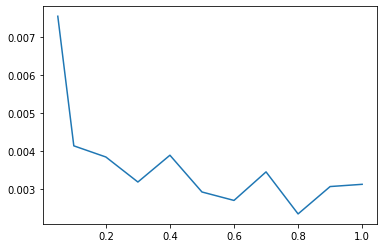

In [18]:
print("NeuralHDSpecial .0001 lr 15 epochs x5 (4 regens) 4 batch_size BIC=True")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)

In [19]:
factors=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=NeuralHDSpecial(9,257,1024,batch_size=4,trainopt=2,bestinclass=True,lr=.0001)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],15,4,0)
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
        
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)

0.05
test
test
test
test
test
test
test
test
test
test
[tensor(0.8826), tensor(0.8771), tensor(0.8855), tensor(0.8752), tensor(0.8958), tensor(0.8877), tensor(0.8947), tensor(0.8800), tensor(0.8859), tensor(0.8749)]
0.1
test
test
test
test
test
test
test
test
test
test
[tensor(0.9017), tensor(0.8885), tensor(0.9113), tensor(0.9098), tensor(0.8977), tensor(0.9054), tensor(0.9006), tensor(0.9058), tensor(0.9043), tensor(0.8966)]
0.2
test
test
test
test
test
test
test
test
test
test
[tensor(0.9142), tensor(0.9043), tensor(0.9234), tensor(0.9194), tensor(0.9120), tensor(0.9260), tensor(0.9257), tensor(0.9131), tensor(0.9220), tensor(0.9194)]
0.3
test
test
test
test
test
test
test
test
test
test
[tensor(0.9349), tensor(0.9400), tensor(0.9341), tensor(0.9371), tensor(0.9360), tensor(0.9315), tensor(0.9374), tensor(0.9360), tensor(0.9352), tensor(0.9396)]
0.4
test
test
test
test
test
test
test
test
test
test
[tensor(0.9400), tensor(0.9371), tensor(0.9455), tensor(0.9334), tensor(0.9382), tens

NeuralHDSpecial .0001 lr 15 epochs x5 (4 regens) 4 batch_size BIC=True NO dropout
[0.8840633, 0.903018, 0.9193964, 0.9359588, 0.94055945, 0.9451601, 0.94865656, 0.9493927, 0.9457122, 0.951969, 0.9562017]


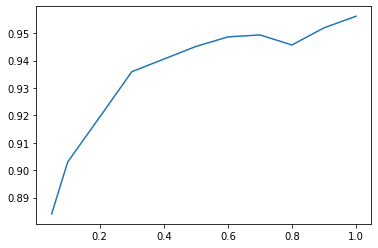

[0.8839528, 0.9021715, 0.917961, 0.93617964, 0.9399706, 0.94431365, 0.94854623, 0.9482517, 0.94714767, 0.9517115, 0.9561281]


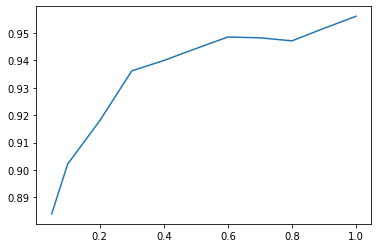

[0.0070835664, 0.00641468, 0.006580739, 0.0023977198, 0.0046071317, 0.0022147484, 0.0033844898, 0.003406039, 0.0030492868, 0.0022254263, 0.0015067697]


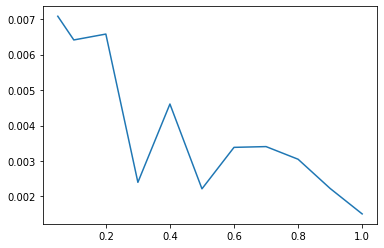

In [20]:
print("NeuralHDSpecial .0001 lr 15 epochs x5 (4 regens) 4 batch_size BIC=True NO dropout")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)

In [21]:
factors=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=NeuralHDSpecial(9,257,1024,batch_size=4,trainopt=2,bestinclass=True,lr=.0001)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],75,0,0)
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
        
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)

0.05
test
test
test
test
test
test
test
test
test
test
[tensor(0.8833), tensor(0.8866), tensor(0.9039), tensor(0.8885), tensor(0.8980), tensor(0.9006), tensor(0.8925), tensor(0.8984), tensor(0.8789), tensor(0.8848)]
0.1
test
test
test
test
test
test
test
test
test
test
[tensor(0.9209), tensor(0.9084), tensor(0.9201), tensor(0.9142), tensor(0.9113), tensor(0.9150), tensor(0.9117), tensor(0.9153), tensor(0.9198), tensor(0.9061)]
0.2
test
test
test
test
test
test
test
test
test
test
[tensor(0.9271), tensor(0.9308), tensor(0.9260), tensor(0.9227), tensor(0.9293), tensor(0.9268), tensor(0.9304), tensor(0.9231), tensor(0.9341), tensor(0.9352)]
0.3
test
test
test
test
test
test
test
test
test
test
[tensor(0.9345), tensor(0.9323), tensor(0.9363), tensor(0.9356), tensor(0.9326), tensor(0.9400), tensor(0.9441), tensor(0.9352), tensor(0.9345), tensor(0.9323)]
0.4
test
test
test
test
test
test
test
test
test
test
[tensor(0.9422), tensor(0.9448), tensor(0.9382), tensor(0.9455), tensor(0.9367), tens

OnlineHDv2 .0001 lr 15 epochs x5 (4 regens) 4 batch_size BIC=True NO dropout
[0.89050424, 0.9146117, 0.9282297, 0.9348546, 0.9405594, 0.9466323, 0.9468163, 0.9501288, 0.9488406, 0.951601, 0.95472944]


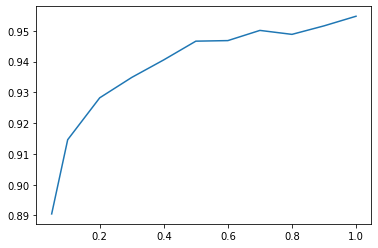

[0.8915715, 0.9142804, 0.9285609, 0.93573797, 0.94037545, 0.94622743, 0.946301, 0.94891423, 0.94825184, 0.9521162, 0.95384616]


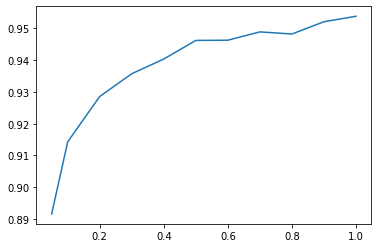

[0.007954038, 0.004757575, 0.0040063723, 0.003531, 0.0035455588, 0.003454405, 0.0035510978, 0.0025060012, 0.0028518757, 0.0032773234, 0.0035040474]


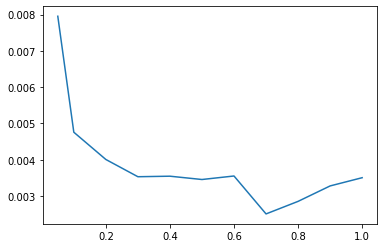

In [22]:
print("OnlineHDv2 .0001 lr 15 epochs x5 (4 regens) 4 batch_size BIC=True NO dropout")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)
plt.show()